# Week 04. k-Nearest Neighbors Classifier

과제는 총 3개의 cell과 markdown 하나를 채워주셔야합니다

1~3 문제는 영상과 실습자료에 나와있는 것들을 적절히 응용하시면 됩니다

마지막 4번의 경우 본인의 생각을 마크다운으로 작성하는 부분입니다

주석의 경우 이미지, 테이블 등의 표현이 어려운 관계로 받지 않겠습니다

### 실습 00. Load dataset

이번 과제에 사용할 dataset은 붓꽃(iris)입니다

scikit-learn은 간단한 여러 데이터들을 library를 사용하여 불러오도록 제공합니다

불러온 dataset은 다양한 method를 제공합니다

load_iris class를 저장하고 아래 method를 사용하여 아래와 같은 data와 target을 만들어주세요

* 사용가능한 method 



1. load_iris.data

2. load_iris.feature_names

3. load_iris.target

4. load_iris.target_names

주의) 반드시 method 4개를 사용해야합니다

target_names는 setosa, versicolor, virginica가 있습니다

target을 불러오면 0,1,2이기 때문에 각 값을 대치시켜야합니다

![](https://i.imgur.com/RYcsvh2.png)
![](https://i.imgur.com/36KLoiI.png)


In [1]:
import pandas as pd
import numpy as np
import os 

from sklearn.datasets import load_iris

''' 변수 = load_iris()로 object를 생성합니다 '''

' 변수 = load_iris()로 object를 생성합니다 '

In [2]:
## 조교 코드
d = load_iris()
data = pd.DataFrame(d.data.columns=d.feature_names)
target = pd.DataFrame(d.target.columns=['target']).apply(lambda x: d.target_names[x])

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-2-61bf405ae810>, line 3)

In [5]:
iris = load_iris()
data = pd.DataFrame(iris.data[:, :4], columns = iris.feature_names)  
target = pd.DataFrame(iris.target, columns = ["target"])
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
target.loc[target["target"] == 0,"target"] = "setosa"
target.loc[target["target"] == 1,"target"] = "versicolor"
target.loc[target["target"] == 2,"target"] = "virginica"
target

,target
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


### 실습 01. Pandas & numpy 사용하기

데이터들을 불러오고 형태를 확인해주세요

DataFrame.shape으로 확인할 수 있습니다

이후, **클래스별** 변수의 갯수와 변수 별 평균, 표준편차를 출력해주세요

출력 양식은 자유롭게 작성하시되, 반드시 위의 요구사항을 만족하여야합니다

In [7]:
print(data.shape, target.shape)
print(len(data.columns))

(150, 4) (150, 1)
4


In [8]:
print(f'A number of variables : {data.shape[1]}')

A number of variables : 4


In [9]:
df0 = pd.DataFrame(data.count())
df1 = pd.DataFrame(data.mean())
df2 = pd.DataFrame(data.std())
df3 = np.hstack((df0,df1,df2))
su = pd.DataFrame(df3, columns=["변수의 갯수","변수의 평균","변수의 표준편차"], 
                  index = ["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"])
su

,변수의 갯수,변수의 평균,변수의 표준편차
sepal length (cm),150.0,5.843333,0.828066
sepal width (cm),150.0,3.057333,0.435866
petal length (cm),150.0,3.758000,1.765298
petal width (cm),150.0,1.199333,0.762238


### 실습 02. Train - test set split

실습수업 마지막에 소개한 dataset분리를 시도합니다

학습용 dataset과 검증용 dataset을 나눠보겠습니다

train_test_split은 data를 간편하게 나눌수 있도록 도와줍니다

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score

target = iris.target

X_train, X_test, y_train, y_test=train_test_split(data,
                                                  target,
                                                  test_size=0.2,shuffle=True)

### 실습 03. k-Nearest Neighbors Classifier

Scikit learn으로부터 kNN Classifier를 불러오겠습니다

In [11]:
from sklearn.neighbors import KNeighborsClassifier
## 조교 추가
from plotly import graph_objs as go

나뉜 데이터셋을 분류하기 위한 적절한 이웃의 갯수 $k$를 찾아보려합니다

반복문을 사용하여 이웃의 갯수을 변화시켜가며 분류하고, 각 class별 정확도를 선형으로 시각화해주세요

아래는 예시 그림입니다

![](https://i.imgur.com/zZOKD42.png)

In [12]:
##조교 코드
X_train, X_test, y_train, y_test = train_test_split(data,
                                                   target,
                                                   test_size=0.2, shuffle=True, random_state=7)

clfs = [KNeighborsClassifier(n_k).fit(X_train.y_train.values.ravel()) for n_k in range(1,20)]

accs=[]
for clf in clfs:
    accs.append([(clf.predict(X_test.values[y_test.values.ravel()==d.target_names[n]])==
                  y_test.values[y_test.values.ravel()==d.target.names[n]]).mean() for n in range(3)])
accs=np.array(accs)
fig=go.Figure()
colors=['rgba(200, 200, 40, 0.8)',
        'rgba(220, 0, 0, 0.8)',
        'rgba(150, 200, 150, 0.8)']
for n,(i,j) in enumerate(zip(d.target_names, colors)):
    
    fig.add_trace(go.Scatter(x=[i for i in range(1,20)], y=accs[:,n],
                            marker=dict(color=j, size=3),
                            name=i))

fig_options={'layout':dict(template='simple_white',
                          width=800, height=500,
                          title='The accuracy for each class by k-neighbors',
                          xaxis_title='Neighbors k',
                          yaxis_title='Accuracy')}
fig.update(fig_options)
fig.show()

    

AttributeError: 'DataFrame' object has no attribute 'y_train'

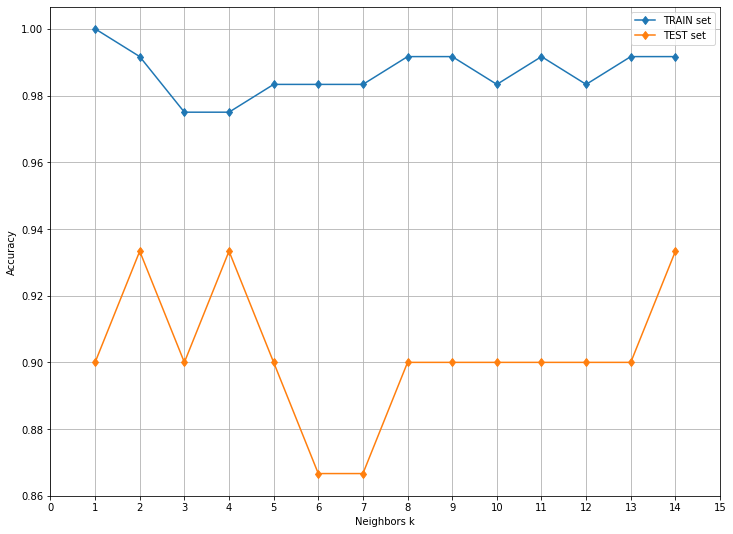

In [13]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

train_acc = []
test_acc = []

for n in range(1,15):
    clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=n)
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append((prediction==y_test).mean())
    
plt.figure(figsize=(12, 9))
plt.plot(range(1, 15), train_acc, label='TRAIN set', marker='d')
plt.plot(range(1, 15), test_acc, label='TEST set', marker='d')
plt.xlabel("Neighbors k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(np.arange(0, 16, step=1))
plt.legend()

이번에는 data의 변수들을 scaling해보고 거리기반으로 분류한 뒤 위와 같은 형태로 시각화해주세요

그리고 각 결과에 대한 본인의 생각을 마크다운으로 자유롭게 작성해주시면 됩니다

In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


X_train, X_test, y_train, y_test=train_test_split(scaled_data,
                                                  target,
                                                  test_size=0.2,shuffle=True)

train_acc = []
test_acc = []

for n in range(1,15):
    clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=n)
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append((prediction==y_test).mean())
    
plt.figure(figsize=(12, 9))
plt.plot(range(1, 15), train_acc, label='TRAIN set', marker='d')
plt.plot(range(1, 15), test_acc, label='TEST set', marker='d')
plt.xlabel("Neighbors k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(np.arange(0, 16, step=1))
plt.legend()

NameError: name 'StandardScaler' is not defined

데이터를 scale하지 않을 경우 n=13일때 가장 높은 정확도를 보이는 반면 scale할 경우 n = 7일때 가장 높은 정확도를 보여줍니다.   
n의 값이 차이가 나는 이유는  scale을 하기전에 sepal length 특징의 값이 가장 크고
petal width의 값이 가장 작기때문에 변수들간 클래스 결정에 영향을 주는 정도가 차이가 나기 때문에 변수들을 scale을 한 것보다 많은 이웃들을 조사해야만 model의 결정경계가 단순해지면서 Test에 대한 정확도를 높게 만들수 있기 때문이라고 생각됩니다.  
scale을 한 경우 변수들간 미치는 영향이 동일하기 때문에 어느 순간부터는 동일한 성능을 보여주는 것은 n=7일때부터 model의 결정경계가 정립되면서 더이상의 추가적인 이웃이 class 분류에 영향을 끼치는 것을 최소화 시킨것으로 보입니다.